In [1]:
from init import *
import geopandas as gpd
from fiona.crs import from_epsg
import folium, time, rasterio, ee
ee.Initialize()
from matplotlib.colors import ListedColormap

autotime loaded.


In [2]:
def get_times_stamp(year, month):
    if month in [1, 3, 5, 7, 8, 10, 12]:
        last_day = 31
    elif month in [4, 6, 9, 11]:
        last_day = 30    
    elif month==2 and year%2==0:
        last_day = 29
    else:
        last_day = 28 
    mon_num = str(month).zfill(2)
    start = '%s-%s-01'%(year, mon_num)
    last  = '%s-%s-%s'%(year,mon_num, last_day)
    return start, last 

def select_collection(year):
    imgs = ee.ImageCollection("TOMS/MERGED")
    bands = ['B4', 'B3']
    return imgs, bands   
        

time: 2.29 ms


In [3]:
gstat = {}
eetrip = ee.FeatureCollection("users/pankajkmr1990/NE_lat_lon")
geom = ee.Geometry.Point([11.4, -70.5]) # Maitri
for year in np.arange(1990, 2010):
    print(year)
    for month in np.arange(1, 13):
        start, end = get_times_stamp(year, month)  
        imgs, bands  = select_collection(year)
        imgs = imgs.filterDate(start, end).median()
        ndvi = imgs.select('ozone')
        try:
            gstat[start] = ndvi.reduceRegion(ee.Reducer.mean(), geom, 10000).get("ozone").getInfo()
        except:
            pass
        
gstat

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


{'1990-01-01': 307,
 '1990-03-01': 274.5,
 '1990-04-01': 268,
 '1990-05-01': None,
 '1990-06-01': None,
 '1990-07-01': None,
 '1990-08-01': 248,
 '1990-09-01': 181,
 '1990-10-01': 202.5,
 '1990-11-01': 249,
 '1990-12-01': 268,
 '1991-01-01': 296,
 '1991-02-01': 290,
 '1991-03-01': 276.5,
 '1991-04-01': 261,
 '1991-05-01': None,
 '1991-06-01': None,
 '1991-07-01': None,
 '1991-08-01': 241.5,
 '1991-09-01': 202,
 '1991-10-01': 230,
 '1991-11-01': 232,
 '1991-12-01': 325,
 '1992-01-01': 305.5,
 '1992-02-01': 308.5,
 '1992-03-01': 281,
 '1992-04-01': 292,
 '1992-05-01': None,
 '1992-06-01': None,
 '1992-07-01': None,
 '1992-08-01': 243,
 '1992-09-01': 172.5,
 '1992-10-01': 149,
 '1992-11-01': 181.5,
 '1992-12-01': 289,
 '1993-01-01': 299,
 '1993-02-01': 304,
 '1993-03-01': 294,
 '1993-04-01': 282.5,
 '1993-05-01': None,
 '1993-06-01': None,
 '1993-07-01': None,
 '1993-08-01': 229,
 '1993-09-01': 175,
 '1993-10-01': 171,
 '1993-11-01': 189,
 '1993-12-01': 267,
 '1994-01-01': 310,
 '1994-03-

time: 3min 46s


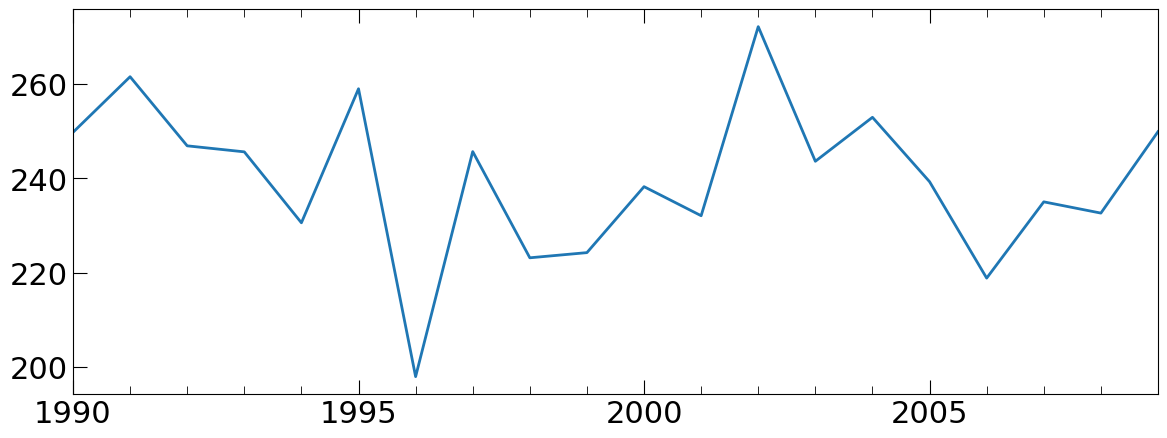

time: 258 ms


In [4]:
gstat = pd.Series(gstat)
gstat.index = pd.to_datetime(gstat.index)
gstat.to_csv('../data/ee.toms.toc.csv', index=True, index_label='Date', float_format='%0.3f')
gstat.resample('A').mean().plot(figsize=(14, 5))
plt.show()